# 1 이미지를 인식하는 원리

In [1]:
import tensorflow
tf = tensorflow.keras
(X_train, y_train), (X_test, y_test) = tf.datasets.mnist.load_data()
print('학습셋 이미지 수 : %d개'%(X_train.shape[0]))
print('테스트셋 이미지 수 : %d개'%(X_test.shape[0]))

11490434/11490434 [==============================] - 1s 0us/step
학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


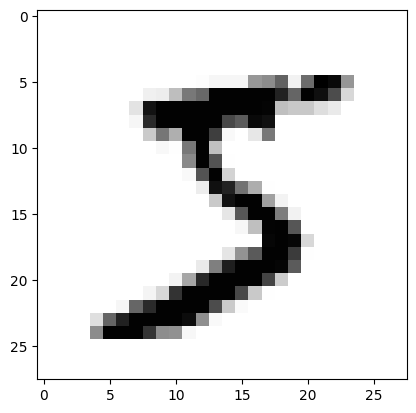

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s'%i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [4]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
print('class : %d'%(y_train[0]))

class : 5


In [5]:
y_train = tf.utils.to_categorical(y_train, 10)
y_test = tf.utils.to_categorical(y_test, 10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 2 딥러닝 기본 프레임 만들기

In [6]:
(X_train, y_train), (X_test, y_test) = tf.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = tf.utils.to_categorical(y_train, 10)
y_test = tf.utils.to_categorical(y_test, 10)

In [7]:
model = tf.models.Sequential()
model.add(tf.layers.Dense(512, input_dim=784, activation='relu'))
model.add(tf.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
import os

MODel_DIR = './model/'
if not os.path.exists(MODel_DIR):
    os.mkdir(MODel_DIR)

modelpath = './MNIST_MLP.hdf5'
checkpointer = tf.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                                            save_best_only=True)
early_stopping_callback = tf.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [10]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18637, saving model to .\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18637 to 0.13327, saving model to .\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13327 to 0.11313, saving model to .\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11313 to 0.10222, saving model to .\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10222 to 0.09442, saving model to .\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09442 to 0.09213, saving model to .\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09213 to 0.08086, saving model to .\MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08086

Epoch 9: val_loss improved from 0.08086 to 0.08039, saving model to .\MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08039

Epoch 11: val_loss did not improve from 0.08039

Epoch 12: val_loss improved from 0.08039 to 0.07910, saving model to .\MNIST_MLP.hdf5

Epoch 13: val_loss improved from 0.07910 to 0.07780, saving model to .\MNIST_MLP.h

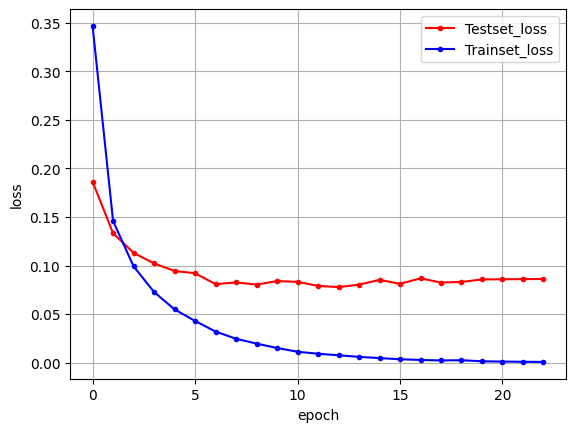

In [11]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']

# 학습셍의 오차
y_loss = history.history['loss']

# 그래프로 표현함
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()